<a href="https://colab.research.google.com/github/CamelGoong/PY_TensorFlow/blob/main/Part03_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01 딥러닝 준비

1-1 주요 용어

> 1-1-5 경사하강법

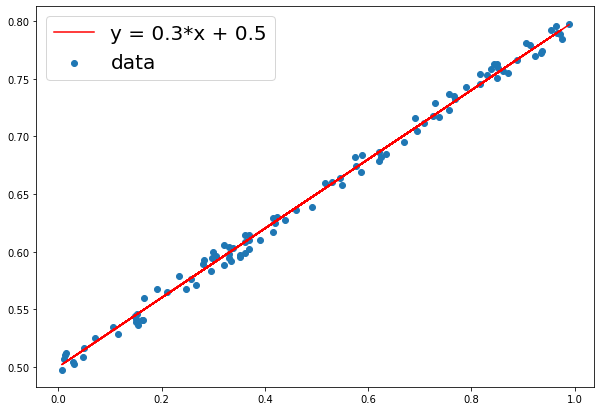

W: 0.3, b: 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape) # 노이즈 정의
  yy = y + noise
  plt.figure(figsize = (10, 7))
  plt.plot(x, y, color = 'r', label = f'y = {w}*x + {b}')
  plt.scatter(x, yy, label = 'data')
  plt.legend(fontsize = 20)
  plt.show()
  print(f'W: {w}, b: {b}')
  return x, yy

x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)

In [7]:
num_epoch = 1000
learning_rate = 0.005
errors = []

# w와 b 초기화
w = np.random.uniform(low = 0.0, high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(num_epoch):
  # hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5 * ((y_hat - y) ** 2).sum()
  if error < 0.005:
    break
  
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2}w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
  
print("______" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0w = 0.82236, b = 0.44448 error = 18.19343
 5w = 0.66364, b = 0.30982 error = 0.61343
10w = 0.60531, b = 0.33903 error = 0.43283
15w = 0.55683, b = 0.36456 error = 0.30598
20w = 0.51611, b = 0.38602 error = 0.21646
25w = 0.48191, b = 0.40405 error = 0.15329
30w = 0.45317, b = 0.41919 error = 0.10871
35w = 0.42903, b = 0.43191 error = 0.07725
40w = 0.40875, b = 0.44260 error = 0.05505
45w = 0.39172, b = 0.45157 error = 0.03938
50w = 0.37741, b = 0.45911 error = 0.02833
55w = 0.36539, b = 0.46545 error = 0.02052
60w = 0.35529, b = 0.47077 error = 0.01502
65w = 0.34681, b = 0.47524 error = 0.01113
70w = 0.33968, b = 0.47899 error = 0.00839
75w = 0.33370, b = 0.48215 error = 0.00646
80w = 0.32867, b = 0.48480 error = 0.00509
__________________________________________________________________________________________
81 w = 0.3, b = 0.5 error = 0.00487


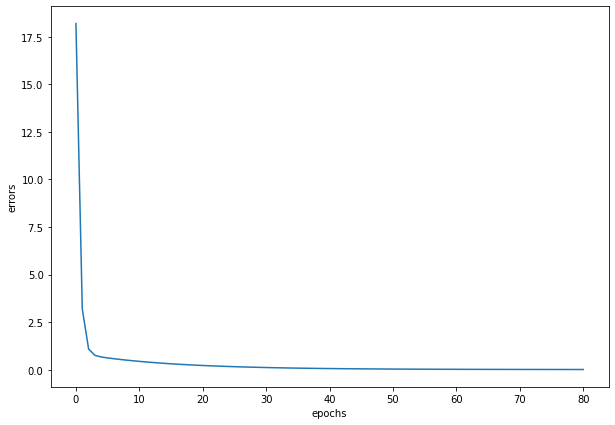

In [8]:
plt.figure(figsize = (10, 7))
plt.plot(errors)
plt.xlabel("epochs")
plt.ylabel("errors")
plt.show()

#02 단순 신경망 훈련

[1 2 3 4 5]
[ 5  8 11 14 17]


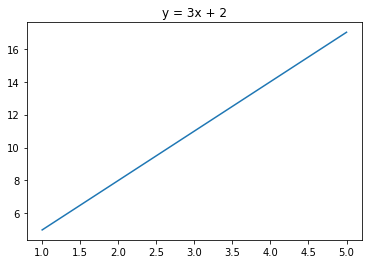

In [9]:
x = np.arange(1,6)

y = 3 * x + 2
print(x)
print(y)

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title("y = 3x + 2")
plt.show()

In [14]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape = [1])
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

In [19]:
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 9ms/step - loss: 0.0831 - mae: 0.2475
Epoch 2/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0826 - mae: 0.2466
Epoch 3/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.0820 - mae: 0.2458
Epoch 4/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0815 - mae: 0.2450
Epoch 5/1200
1/1 [==============================] - 0s 7ms/step - loss: 0.0809 - mae: 0.2441
Epoch 6/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0804 - mae: 0.2433
Epoch 7/1200
1/1 [==============================] - 0s 8ms/step - loss: 0.0798 - mae: 0.2425
Epoch 8/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.0793 - mae: 0.2417
Epoch 9/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0787 - mae: 0.2409
Epoch 10/1200
1/1 [==============================] - 0s 6ms/step - loss: 0.0782 - mae: 0.2400
Epoch 11/1200
1/1 [==============================] - 0s 7ms/step - lo

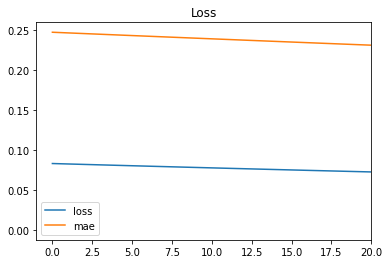

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['mae'], label = 'mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [21]:
model.evaluate(x, y)

1/1 [==============================] - 0s 93ms/step - loss: 2.4536e-05 - mae: 0.0043


[2.453625165799167e-05, 0.004251575563102961]

In [22]:
model.predict([10]) # 원래 정의했던 식에 의해서 도출되는 결과값인 32에 매우 근사.

array([[32.02055]], dtype=float32)

# 03 심층 신경망으로 이미지 분류

In [24]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [26]:
print('train set: ', x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


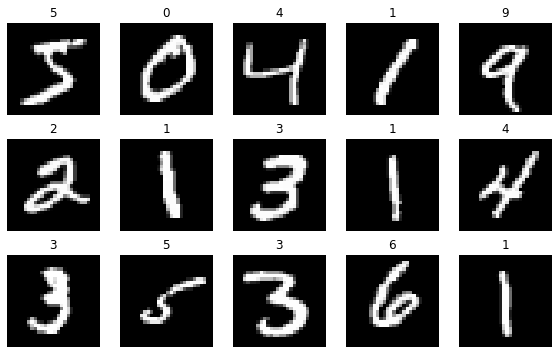

In [27]:
# 데이터 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

> 3-2 데이터 전처리

In [28]:
# 이미지 데이터 정규화 전처리
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

> 3-3 Fatten 레이어

In [29]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 shape 변경후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 shape 변경후: (60000, 784)


> 3-5 입력과 출력

In [30]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])

> 3-6 손실함수, 3-7 옵티마이저, 3-8 평가지표

In [32]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

> 3-8 훈련

In [34]:
model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          epochs = 10,
          )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2289 - accuracy: 0.9325 - val_loss: 0.1106 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0936 - accuracy: 0.9720 - val_loss: 0.1024 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 0.0943 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.0915 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9869 - val_loss: 0.0852 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0942 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0777 - val_accuracy:

> 3-10 평가

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0939 - accuracy: 0.9806
검증 셋 정확도: 0.9805999994277954


In [38]:
predictions = model.predict(x_test)
print('첫번째 입력 이미지에 대한 확률값: ' ,predictions[0])

첫번째 입력 이미지에 대한 확률값:  [7.0005446e-10 6.0477964e-07 3.4056902e-07 3.2566413e-07 1.8155964e-08
 1.7641090e-11 1.1967517e-11 9.9999774e-01 9.1491472e-08 8.5601317e-07]


In [40]:
print("첫번째 입력 이미지에 대한 예측 클래스: ", np.argmax(predictions[0]))

첫번째 입력 이미지에 대한 예측 클래스:  7


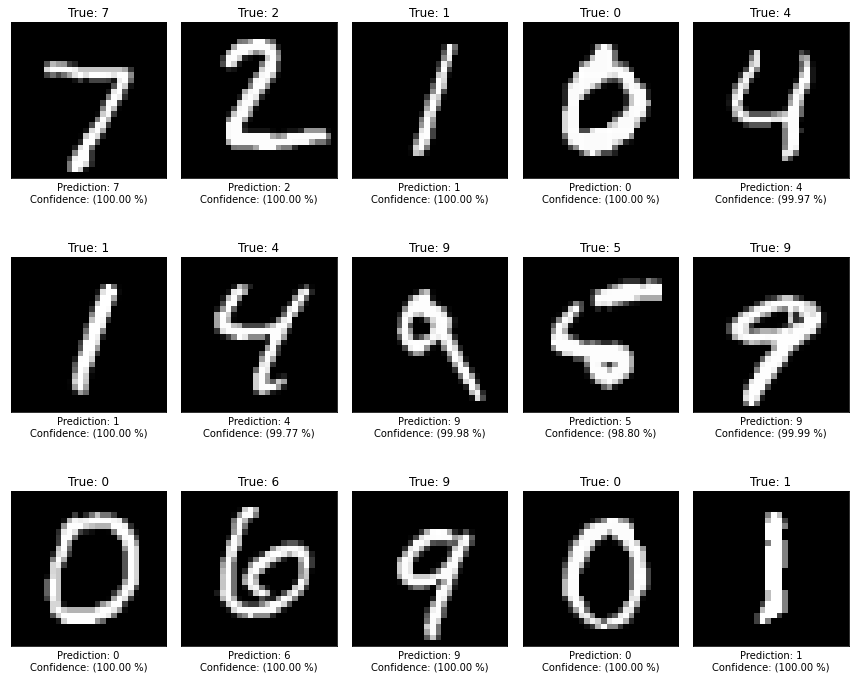

In [43]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
  
  return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3,5)
fig.set_size_inches(12, 10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  # imshow로 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()